# Activity: Validate and clean your data

## Introduction

In this activity, you will use input validation and label encoding to prepare a dataset for analysis. These are fundamental techniques used in all types of data analysis, from simple linear regression to complex neural networks. 

In this activity, you are a data professional an investment firm that is attempting to invest in private companies with a valuation of at least $1 billion. These are often known as "unicorns." Your client wants to develop a better understanding of unicorns, with the hope they can be early investors in future highly successful companies. They are particularly interested in the investment strategies of the three top unicorn investors: Sequoia Capital, Tiger Global Management, and Accel. 

## Step 1: Imports

Import relevant Python libraries and packages: `numpy`, `pandas`, `seaborn`, and `pyplot` from `matplotlib`.

In [1]:
# Import libraries and packages.

### YOUR CODE HERE ### 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

The data contains details about unicorn companies, such as when they were founded, when they achieved unicorn status, and their current valuation. Load the dataset `Modified_Unicorn_Companies.csv` as `companies` and display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab, so they may be different from similar data used in prior labs.

In [2]:
# Load the data.

### YOUR CODE HERE ### 
companies = pd.read_csv("Modified_Unicorn_Companies.csv")

# Display the first five rows.

### YOUR CODE HERE ### 
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


## Step 2: Data cleaning


Begin by displaying the data types of the columns in `companies`.

In [3]:
# Display the data types of the columns.

### YOUR CODE HERE ###
companies.dtypes

Company             object
Valuation            int64
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review what you have learned about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

There is a `pandas` DataFrame property that displays the data types of the columns in the specified DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

  The `pandas` DataFrame `dtypes` property will be helpful.

</details>

### Correct the data types

If any of the data types in `companies` are incorrect, fix them and save them back to `companies`.

In [4]:
# Apply necessary datatype conversions.

### YOUR CODE HERE ###
import datetime
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

### Create a new column

Add a column called `Years To Unicorn`, which is the number of years between when the company was founded and when it became a unicorn.

In [5]:
# Create the column Years To Unicorn.

### YOUR CODE HERE ###
companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Extract just the year from the `Date Joined` column. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Use `dt.year` to access the year of a datetime object.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subtract the `Year Founded` from the `Date Joined`, and save it to a new column called `Years To Unicorn`.
  
Ensure you're properly extracting just the year (as an integer) from `Date Joined`.

</details>

**QUESTION: Why might your client be interested in how quickly a company achieved unicorn status?**

Information or patterns could be found on why and how the company achieved this success. This information could be used to look at future investments. 

### Input validation

The data has some issues with bad data, duplicate rows, and inconsistent `Industry` labels.

Identify and correct each of these issues.

Analyze the `Years To Unicorn` column and fix any issues with the data. Use your best judgement on the best approach to correct errors.

In [7]:
# Identify and correct the issue with Years To Unicorn.

### YOUR CODE HERE ###
companies['Years To Unicorn'].describe()

count    1074.000000
mean        7.013035
std         5.331842
min        -3.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

In [8]:
print(companies[companies['Years To Unicorn'] < 0]['Company'].values)

['InVision']


In [13]:
companies.loc[companies['Company'] == 'InVision', 'Year Founded'] = 2011
companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']

In [14]:
print(companies[companies['Years To Unicorn'] < 0]['Company'].values)

[]


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

A company cannot reach unicorn status before it is founded. In other words, `Years to Unicorn` cannot be less than 0.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Find the company that has a negative `Years to Unicorn`, and use an internet search to determine which date for that company is incorrect.
    
Either drop this row from the analysis or replace the incorrect value with the correct one found by your internet search.

</details>

The company provided you with the following list of industry labels to identify in the data for `Industry`. Note: Any industry labels that are in companies but not in industry_list are misspellings.

In [16]:
# List provided by the company of the expected industry labels in the data
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

Verify the industry labels provided by the business are the only possible values in `Industry`. If there are additional labels, correct the data so only the labels above are present in `Industry`.

In [23]:
# Correct misspelled Industry values in companies.

### YOUR CODE HERE ###
print(companies['Industry'].nunique())

15


In [21]:
# dictionary that maps the correct spelling to the incorrect spelling and then replaces them
industry_dct = {'Artificial Intelligence':'Artificial intelligence',
                'Data management and analytics':'Data management & analytics',
                'FinTech':'Fintech'}
companies['Industry'] = companies['Industry'].replace(industry_dct)

In [22]:
print(companies['Industry'].nunique())

15


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `unique()` to access the unique values in a `pandas` Series.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Compare the values in `industry_list` to the unique industries in `Industry`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>   

The `replace()` function in `pandas` can replace the incorrect strings in `Industry` with the correct ones.    
    
</details>

The business mentioned that no `Company` should appear in the data more than once. Verify that this is true, and, if not, clean the data so each `Company` appears only once.

In [25]:
# Check and remove duplicate Company values in companies.

### YOUR CODE HERE ###
print(companies['Company'].duplicated().sum())

3


In [28]:
companies.drop_duplicates(subset=['Company'], inplace=True)

In [29]:
print(companies['Company'].duplicated().sum())

0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Check for duplicated rows in `Company`, not just the whole data. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The `pandas` `duplicated()` function can indentify duplicated rows. Apply it to the `Company` column in `companies` to find which companies appear more than once.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Remove duplicate rows with `drop_duplicates()`, or remove rows based off of their indices.
    
</details>

**Question: Why is it important to perform input validation?**

Duplicate, flase or incorrect values can affect the data. 

**Question: What steps did you take to perform input validation for this dataset?**

We first corrected any data types that were wrong. We then looked at input validation and corrected any values. Lastly we fixed any duplicate data. 

### Change categorical data to numerical data

Two common methods for changing categorical data to numerical are creating dummy variables and label encoding. There is no best method, as the decision on which method to use depends on the context and must be made on a case-to-case basis.

Using what you've learned so far, apply the appropriate methods for converting the following variables to numeric: `Valuation`,  `Continent`, `Country/Region`, and `Industry`.

Create a 'simplified' representation of `Valuation` with two categories: one that denotes if the `Valuation` was in the top 50% of valuations in the data and one if it was not.

In [30]:
# Convert Valuation to numeric.

### YOUR CODE HERE ###
companies['High Valuation'] = pd.qcut(companies['Valuation'], 2, labels=['Yes', 'No'])
companies['High Valuation'] = companies['High Valuation'].cat.codes


0    1
1    1
2    1
3    1
4    1
Name: High Valuation, dtype: int8

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about organizing data into equal quantiles.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Divide the data into two equal quantiles. Then, convert the categories created in the first step to numeric. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pandas` `qcut()` to divide the data into equal sized buckets. Use `.cat.codes` to convert categorical labels to numeric. 
    
</details>

### Convert `Continent` to numeric

In [37]:
# Convert Continent to numeric data.

### YOUR CODE HERE ###
continent_dum = pd.get_dummies(companies['Continent'], drop_first=True)
companies = pd.concat([companies, continent_dum], axis=1)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider whether there are many or few unique `Continent` variables.
    
</details>

In [38]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation,Asia,Europe,North America,Oceania,South America
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,1,1,0,0,0,0
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,1,0,0,1,0,0
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,1,1,0,0,0,0
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,1,0,0,1,0,0
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,1,0,1,0,0,0


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Consider whether `Continent` data is in a particular order.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Two useful functions are `get_dummies()` and `pd.concat()`.
    
</details>

### Convert `Country/Region` to numeric

In [41]:
# Convert Country/Region to numeric data.

### YOUR CODE HERE ###
companies['Country/Region'] = companies['Country/Region'].astype('category').cat.codes

In [42]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation,Asia,Europe,North America,Oceania,South America
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,9,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,1,1,0,0,0,0
1,SpaceX,100,2012-12-01,Other,Hawthorne,44,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,1,0,0,1,0,0
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,9,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,1,1,0,0,0,0
3,Stripe,95,2014-01-23,Fintech,San Francisco,44,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,1,0,0,1,0,0
4,Klarna,46,2011-12-12,Fintech,Stockholm,38,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,1,0,1,0,0,0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review what you have learned about converting a variable with a string/object data type to a category.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Consider whether there are many or few unique `Country/Region` variables.

    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

To use label encoding, apply `.astype('category').cat.codes` to the `Country/Region` in `companies`.
    
To use dummy variables, two useful functions are `get_dummies()` and `pd.concat()`.
    
</details>

### Convert `Industry` to numeric

In [43]:
# Convert Industry to numeric data.

### YOUR CODE HERE ###
industry_dum = pd.get_dummies(companies['Industry'], drop_first=True)
companies = pd.concat([companies, industry_dum], axis=1)

In [44]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,...,E-commerce & direct-to-consumer,Edtech,Fintech,Hardware,Health,Internet software & services,Mobile & telecommunications,Other,"Supply chain, logistics, & delivery",Travel
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,9,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",...,0,0,0,0,0,0,0,0,0,0
1,SpaceX,100,2012-12-01,Other,Hawthorne,44,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",...,0,0,0,0,0,0,0,1,0,0
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,9,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",...,1,0,0,0,0,0,0,0,0,0
3,Stripe,95,2014-01-23,Fintech,San Francisco,44,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",...,0,0,1,0,0,0,0,0,0,0
4,Klarna,46,2011-12-12,Fintech,Stockholm,38,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",...,0,0,1,0,0,0,0,0,0,0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider whether there are many or few unique `Industry` variables.

    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Review what you have learned about converting a variable with a string/object data type to a category.

    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

To use label encoding, apply `.astype('category').cat.codes` to the `Country/Region` in `companies`.
    
To use dummy variables, two useful functions are `get_dummies()` and `pd.concat()`.
    
</details>

**Question: Which categorical encoding approach did you use for each variable? Why?**

[Write your response here. Double-click (or enter) to edit.]

### Convert the top three unicorn investors to numeric

Create three dummy variables (one for each investor) that denotes if the following investors are included as `Select Investors`: Sequoia Capital, Tiger Global Management, and Accel.

For the purpose of this lab, these investors are called the 'Big 3' unicorn investment groups.

In [45]:
# Create a dummy variable that denotes if Sequoia Capital is a Select Investor.

### YOUR CODE HERE ### 
companies['Sequoia Capital'] = companies['Select Investors'].str.contains('Sequoia Capital')

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,...,Edtech,Fintech,Hardware,Health,Internet software & services,Mobile & telecommunications,Other,"Supply chain, logistics, & delivery",Travel,Sequoia Capital
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,9,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",...,0,0,0,0,0,0,0,0,0,True
1,SpaceX,100,2012-12-01,Other,Hawthorne,44,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",...,0,0,0,0,0,0,1,0,0,False
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,9,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",...,0,0,0,0,0,0,0,0,0,True
3,Stripe,95,2014-01-23,Fintech,San Francisco,44,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",...,0,1,0,0,0,0,0,0,0,False
4,Klarna,46,2011-12-12,Fintech,Stockholm,38,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",...,0,1,0,0,0,0,0,0,0,True


In [46]:
companies['Sequoia Capital'] = companies['Sequoia Capital'].astype(int)
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,...,Edtech,Fintech,Hardware,Health,Internet software & services,Mobile & telecommunications,Other,"Supply chain, logistics, & delivery",Travel,Sequoia Capital
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,9,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",...,0,0,0,0,0,0,0,0,0,1
1,SpaceX,100,2012-12-01,Other,Hawthorne,44,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",...,0,0,0,0,0,0,1,0,0,0
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,9,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",...,0,0,0,0,0,0,0,0,0,1
3,Stripe,95,2014-01-23,Fintech,San Francisco,44,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",...,0,1,0,0,0,0,0,0,0,0
4,Klarna,46,2011-12-12,Fintech,Stockholm,38,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",...,0,1,0,0,0,0,0,0,0,1


In [48]:
# Create a dummy variable that denotes if Tiger Global Management is a Select Investor.

### YOUR CODE HERE ### 
companies['Tiger Global Management'] = companies['Select Investors'].str.contains('Tiger Global Management')
companies['Tiger Global Management'] = companies['Tiger Global Management'].astype(int)

In [49]:
# Create a dummy variable that denotes if Accel is a Select Investor.

### YOUR CODE HERE ### 
companies['Accel'] = companies['Select Investors'].str.contains('Accel')
companies['Accel'] = companies['Accel'].astype(int)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

For `Sequoia Capital`, check if the `Select Investors` column contains the string `'Sequoia Capital'`.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The `.str.contains()` function can determine whether a string contains a particular substring.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Once you've applied `.str.contains()` to `Select Investors`, convert the column to binary using `.astype(int)`.
    
</details>

**Question: How does label encoding change the data?**

It assigns each category a unique number

**Question: What are the benefits of label encoding?**

It is useful for large amount of data and easier for machine learning. 

**Question: What are the disadvantages of label encoding?**

It may be more difficult to interpret and create uneccessary relationships between values. 

## Step 3: Model building

Create three bar plots to visualize the distribution of investments by industry for the following unicorn investors: Sequoia Capital, Tiger Global Management, and Accel.

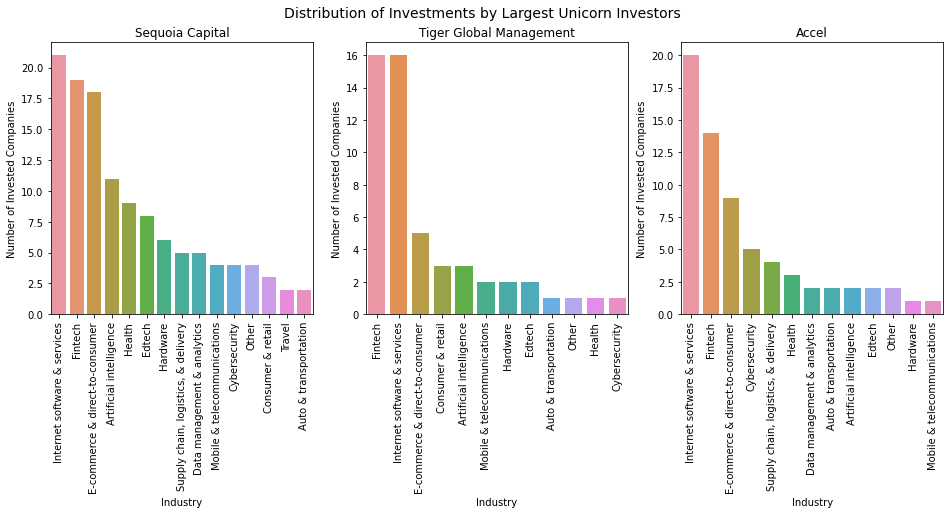

In [54]:
# Create 3 bar plots for the distribution of investments by industry for each top unicorn investors.

### YOUR CODE HERE ### 
fig, axes = plt.subplots(1, 3, figsize = (16,5))
count = 0

for c in ['Sequoia Capital', 'Tiger Global Management', 'Accel']:
    companies_sample = companies[companies[c] == 1]
    companies_sample = companies_sample['Industry'].value_counts()
    
    sns.barplot(
        x = companies_sample.index,
        y = companies_sample.values,
        ax = axes[count])
    
    axes[count].set_title(c)
    
    axes[count].set_xlabel('Industry')
    
    axes[count].set_ylabel('Number of Invested Companies')
    
    axes[count].set_xticklabels(companies_sample.index, rotation=90)
    
    count += 1
    
plt.suptitle('Distribution of Investments by Largest Unicorn Investors', fontsize = 14);
    

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Generate three seperate figures or use the `subplot()` function to put all plots on one figure.
   
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

For each plot, filter the data to only inlcude companies invested in by that unicorn investor. 
    
Use `value_counts()` to calculate the distribution of `Industry` in the subsetted data.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

First, apply `value_counts()` to the `Industry` column in the subsetted data, Then, access the `x` values for the bar plot using `.index` from the `value_counts()` Series output and access the `y` values using `.values`.
    
</details>

**Question: What do you notice about the industries invested in by each top unicorn investor?**

The top 3 industry by each investor are the same, Internet software & services, Fintech, and E-commerce

### Continents 

Create a visualization that shows the continents of the unicorns invested in by the top three unicorn investors.

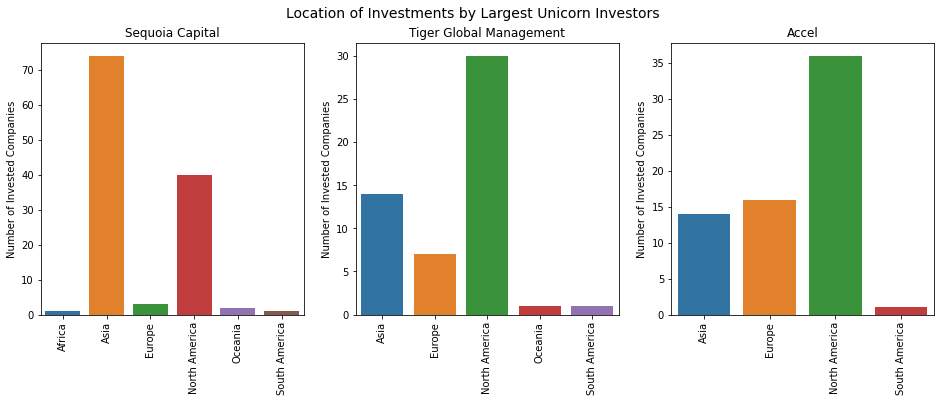

In [55]:
# Visualize the continents invested in by the top three unicorn investors.

### YOUR CODE HERE ### 
fig, axes = plt.subplots(1, 3, figsize = (16,5))
count = 0

for c in ['Sequoia Capital', 'Tiger Global Management', 'Accel']:
        companies_sample = companies[companies[c] == 1]
        companies_sample = companies_sample['Continent'].value_counts()
        companies_sample = companies_sample.sort_index()
        
        sns.barplot(
        x = companies_sample.index,
        y = companies_sample.values,
        ax = axes[count])
    
        axes[count].set_title(c)
    
        axes[count].set_ylabel('Number of Invested Companies')
    
        axes[count].set_xticklabels(companies_sample.index, rotation=90)
    
        count += 1
    
plt.suptitle('Location of Investments by Largest Unicorn Investors', fontsize = 14);

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use steps from the previous exercise as a starting point.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use a similar approach to the previous problem, but select `Continent` on the x-axis instead of `Industry`.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

It is helpful (though unneccessary) to standardize the x labels and y range for all three plots for easy comparison.
    
</details>

**Question: What do you notice about the continents invested in by each top unicorn investor?**

[Write your response here. Double-click (or enter) to edit.]

## Step 4: Results and evaluation

Your client wants to know if there are particular investment strategies for the three large unicorn investors: Sequoia Capital, Tiger Global Management, and Accel. Therefore, consider how you would present your findings and whether the business will find that information insightful.

### Calculate the average `Years to Unicorn` 

In [59]:
# Compute the mean Years to Unicorn for unicorn companies invested in by Sequoia Capital.

### YOUR CODE HERE ### 
print(companies[companies['Sequoia Capital']==1]['Years To Unicorn'].mean())

# Compute the mean Years to Unicorn for unicorn companies invested in by Tiger Global Management.

### YOUR CODE HERE ### 
print(companies[companies['Tiger Global Management']==1]['Years To Unicorn'].mean())

# Compute the mean Years to Unicorn for unicorn companies invested in by Accel.

### YOUR CODE HERE ### 
print(companies[companies['Accel']==1]['Years To Unicorn'].mean())

6.570247933884297
7.264150943396227
6.895522388059701


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Subset the data to only include companies invested in by that particular unicorn investor.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Once you've computed the mean `Years To Unicorn` for one investor, reuse that code to calculate the averages for the other investors. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Apply `.mean()` to the `Years To Unicorn` in the data subset for each investment company.
    
</details>

**Question: Of the three top unicorn investors, which has the shortest average `Years to Unicorn`?**

Sequioa Capital

### Find the three companies with the highest `Valuation` 

In [61]:
# Sort companies by Valuation in descending order.

### YOUR CODE HERE ### 
companies = companies.sort_values(by='Valuation', ascending=False)

# Calculate the 3 companies with the highest valuation invested in by Sequoia Capital.

### YOUR CODE HERE ### 
print(companies[companies['Sequoia Capital']==1]['Company'].values[:3])

# Calculate the 3 companies with the highest valuation invested in by Tiger Global Management.

### YOUR CODE HERE ### 
print(companies[companies['Tiger Global Management']==1]['Company'].values[:3])

# Calculate the 3 companies with the highest valuation invested in by Accel.

### YOUR CODE HERE ### 
print(companies[companies['Accel']==1]['Company'].values[:3])

['Bytedance' 'SHEIN' 'Klarna']
['SHEIN' 'Checkout.com' 'JUUL Labs']
['Miro' 'goPuff' 'Swiggy']


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Sort the full `companies` data by `Valuation`.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

When filtering `companies`, the filtered data will retain any sorting applied.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subset the data to only include unicorns invested in by that particular investment company. Then, use `['Company'].values[:3]` to access the first three companies.
    
</details>

**Question: What are the three companies with the highest `Valuation` invested in by each of the top three unicorn investors?**

[Write your response here. Double-click (or enter) to edit.]

**Question: Why might it be helpful to provide the business with examples of the unicorns invested in by the top three unicorn investors?**

[Write your response here. Double-click (or enter) to edit.]

### Determine if the three companies invest simultaneously

In [62]:
# Find companies invested in by two or more top unicorn investors.

### YOUR CODE HERE ### 
companies['Big 3 Investors'] = companies['Sequoia Capital'] + companies['Tiger Global Management'] + companies['Accel']
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,...,Health,Internet software & services,Mobile & telecommunications,Other,"Supply chain, logistics, & delivery",Travel,Sequoia Capital,Tiger Global Management,Accel,Big 3 Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,9,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",...,0,0,0,0,0,0,1,0,0,1
1,SpaceX,100,2012-12-01,Other,Hawthorne,44,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",...,0,0,0,1,0,0,0,0,0,0
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,9,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",...,0,0,0,0,0,0,1,1,0,2
3,Stripe,95,2014-01-23,Fintech,San Francisco,44,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",...,0,0,0,0,0,0,0,0,0,0
4,Klarna,46,2011-12-12,Fintech,Stockholm,38,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",...,0,0,0,0,0,0,1,0,0,1


In [63]:
top_companies = companies[companies['Big 3 Investors'] >= 2]
top_companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,...,Health,Internet software & services,Mobile & telecommunications,Other,"Supply chain, logistics, & delivery",Travel,Sequoia Capital,Tiger Global Management,Accel,Big 3 Investors
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,9,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",...,0,0,0,0,0,0,1,1,0,2
34,Getir,12,2021-03-26,E-commerce & direct-to-consumer,Istanbul,41,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",...,0,0,0,0,0,0,1,1,0,2
71,DJI Innovations,8,2015-01-23,Hardware,Shenzhen,9,Asia,2006,$105M,"Accel Partners, Sequoia Capital",...,0,0,0,0,0,0,1,0,1,2
73,Razorpay,8,2020-10-11,Fintech,Bengaluru,19,Asia,2013,$742M,"Sequoia Capital India, Tiger Global Management...",...,0,0,0,0,0,0,1,1,0,2
86,CRED,7,2021-04-06,Fintech,Bengaluru,19,Asia,2018,$922M,"Tiger Global Management, DST Global, Sequoia C...",...,0,0,0,0,0,0,1,1,0,2


In [65]:
top_companies_list = companies[companies['Big 3 Investors'] >= 2]['Company'].values
print(top_companies_list)

['SHEIN' 'Getir' 'DJI Innovations' 'Razorpay' 'CRED' 'Ola Cabs'
 'ChargeBee Technologies' 'Infra.Market' 'Zetwerk' 'Ethos' 'Ironclad'
 'Groww' 'Veriff' 'Zenoti' 'CoinSwitch Kuber' 'Five Star Business Finance'
 'CaptivateIQ' 'Vedantu']


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Some variables that have already been created can help complete this task.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Create a new column in `companies` that counts the number of the top three unicorn investors that invested in it.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

The following code creates a new column, called `Big 3 Investors`, that counts how many of `Sequoia Capital`, `Tiger Global Management`, and `Accel` invested in each unicorn company.
    
`companies['Big 3 Investors'] = companies['Sequoia Capital'] + companies['Tiger Global Management'] + companies['Accel']`
    
Filter for unicorns with multiple `Big 3 Investors` using `companies[companies['Big 3 Investors'] >= 2]`.
</details>

**Question: Do the top three investors invest in the same unicorn companies? If so, how often?**

[Write your response here. Double-click (or enter) to edit.]

## Conclusion

**What are the key takeaways from this lab?**

[Write your response here. Double-click (or enter) to edit.]


**What summary would you provide to stakeholders? Consider industries represented, locations, speed to unicorn status, simultaneous investments, and overall value.**

[Write your response here. Double-click (or enter) to edit.]


**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

